# Signal Reconstruction

### Libraries Import

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Data Processing

In [18]:
# Loading dataframes
df_freq = pd.read_csv("frequency_data.csv")
df_orig = pd.read_csv("signal_data.csv")

# Reconstructing the complex vector X
X_vector = df_freq["X_real"].values + 1j * df_freq["X_imag"].values

# Extracting parameters
N = len(X_vector)
time_t = df_orig["time_s"].values

print(f"Loaded spectral data with {N} coefficients.")

Loaded spectral data with 256 coefficients.


### Inverse Fourier Matrix Construction

In [19]:
def create_idft_matrix(n_samples):
    
    # Defining grid
    j = np.arange(n_samples).reshape(-1, 1)
    k = np.arange(n_samples).reshape(1, -1)

    # Calculating the exponent constant
    exponent_constant = 2j * np.pi / n_samples

    # Creating the matrix
    F_conjugate = np.exp(exponent_constant * j * k)

    # Applying normalization
    F_inv = F_conjugate / n_samples

    return F_inv

F_inv_matrix = create_idft_matrix(N)
print(f"IDFT Matrix Shape: {F_inv_matrix.shape}")

IDFT Matrix Shape: (256, 256)


### Performing the Reconstruction

In [20]:
# Matrix multiplication
x_reconstructed_complex = np.dot(F_inv_matrix, X_vector)

# Disregarding imaginary parts due to errors
x_reconstructed = x_reconstructed_complex.real

print(f"Signal Length: {len(x_reconstructed)}")

Signal Length: 256


### Visualizing the Signal

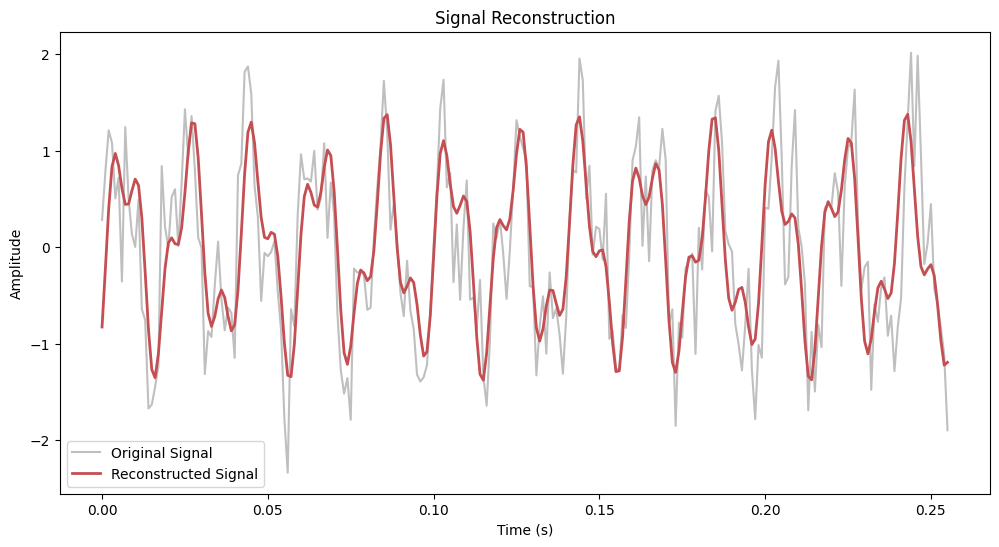

In [21]:
plt.figure(figsize=(12, 6))

# Plotting original signal
plt.plot(time_t, df_orig['signal_amplitude'],
         color='gray', alpha=0.5, label="Original Signal")

# Plotting reconstructed signal
plt.plot(time_t, x_reconstructed,
         color='#c44e52', linewidth=2, label="Reconstructed Signal")

plt.title("Signal Reconstruction")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend(frameon=True)
plt.show()